In [21]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [22]:
df = h5py.File("DataFolders/128RunTry/checkpoints2/checkpoints2_s1.h5",'r')

In [23]:
df_fields = h5py.File("DataFolders/128RunTry/fields_two/fields_two_s1.h5",'r')

In [24]:
lnrho = df['tasks/lnrho'][:]

In [25]:
rho_fields = df_fields['tasks/rho'][:]

In [26]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [27]:
rho = np.exp(lnrho)

In [28]:
rho.min()

0.00846460930426928

In [29]:
rho_fields.min()

0.005302375576259122

In [30]:
df['scales/sim_time'][:]

array([0.        , 0.10036899])

In [31]:
df['scales/iteration'][:]

array([  0, 251])

In [32]:
df_fields['scales/iteration'][:]

array([  0, 251])

In [154]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [34]:
# Some toying around to figure out what x and xVal are, and r

r = 1
length = 10
nx = 32 #formerly 32 x 32 x 160? Current plan is 64 x 64 x 320 or 640
ny = 32
nz = 160
mesh = None
coords = d3.CartesianCoordinates('x', 'y','z')
dist = d3.Distributor(coords, dtype=np.float64, mesh = mesh)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(-r, r))
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(-r, r))
zbasis = d3.RealFourier(coords['z'], size=nz, bounds=(0, length))
x,y,z = dist.local_grids(xbasis,ybasis,zbasis)

p = 0
radmax = 0
# print(x) # prints triple array with single list singleton lists of -1 to  0.9375, 32 elts
# print(z) # similar, 160 elts, from 0 to 9.9375
# print(xbasis)
# print([[i,0,0] for i in range(x.shape[0])]) # prints list of [0,0,0] thru to [31,0,0]
#print(x.shape[0], x.shape[1], x.shape[2]) #prints 32, 1, 1
# print(z.shape[0], z.shape[1], z.shape[2]) #prints 1, 1, 160
# print(x[-1,0,0])
# print(type(x)) # class 'numpy.ndarray' (3D)
# print(x)
# print(type([1,0,0])) # class list (duh)
# print(x[1,0,0]) #prints -0.9375 - must be 
#y = np.ndarray
#y = [[[0]],[[1]],[[2]]] # not how instantiating a numpy array works
# print(y)
#y = x
#print(x)
# print("y mult is", y[1,0,0])
# print("x mult is", x[1,0,0])
#print(x)
#print(y)
#print(z)
for i in range(x.shape[0]):
    xVal = x[i,0,0]
    # print("xval is", xVal)
    for j in range(y.shape[1]):
        yVal = y[0,j,0]
        # print("yVal is", yVal)
        for k in range(z.shape[2]):
            zVal = z[0,0,k]
            rad = np.sqrt(xVal**2 + yVal**2)
            p += 1
            if p % 1000 == 0:
                # print("xVal is", xVal)
                # print("x is", x)
                # print("[i,0,0] is", [i,0,0])
                # print("yVal is", yVal)
                # print("zVal is", zVal) # single number from 0 to 10
                # print("z is", z) # full 160 list
                #print("rad is", rad)
                print("radmax is", radmax)
            radmax = max(rad, radmax)

radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.41

In [43]:
Density = df['tasks/lnrho'][1,:,:,:]

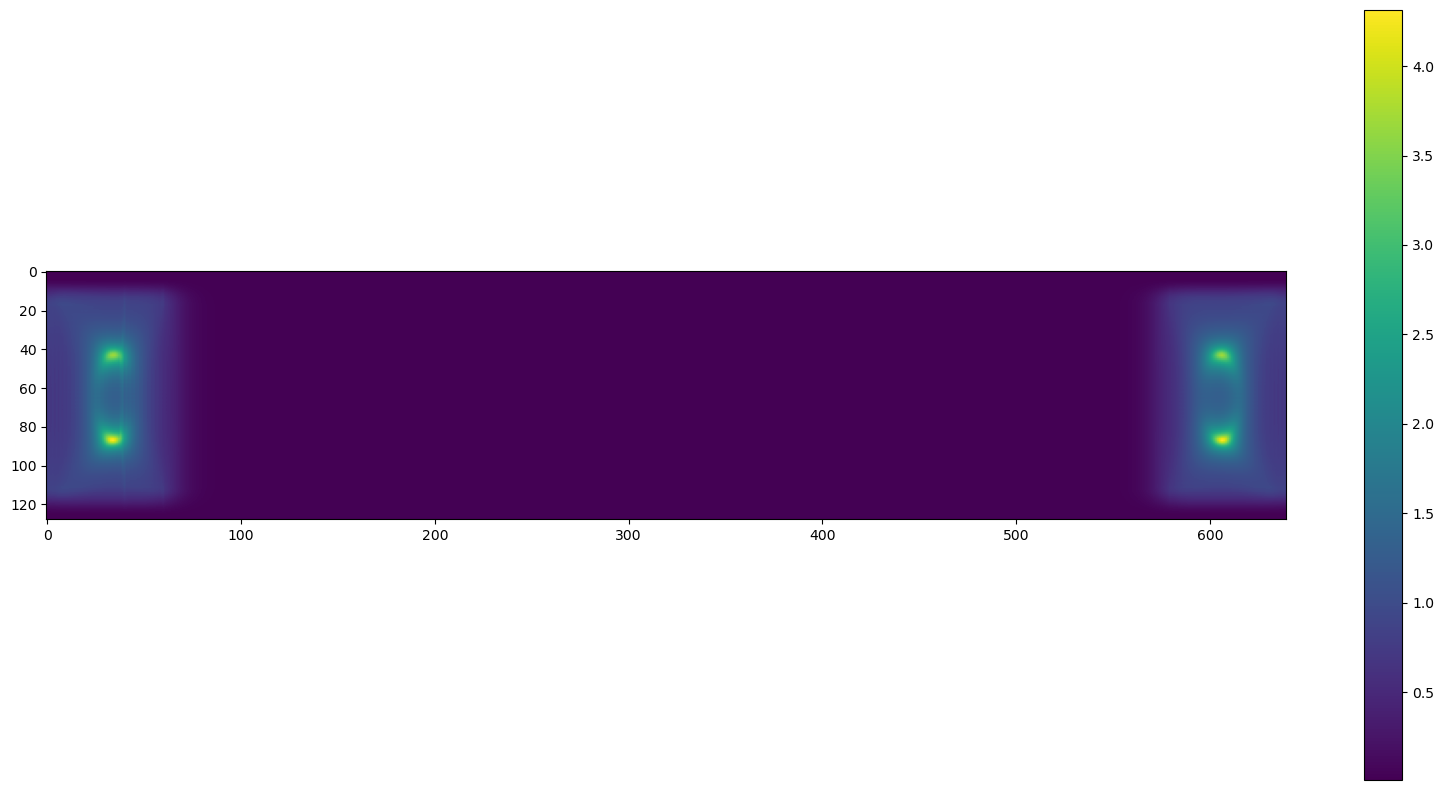

In [64]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(np.exp(Density[:,30,:])) #vmax = 0.01
plt.colorbar()

In [48]:
Temp = df['tasks/T'][1,:,:,:]

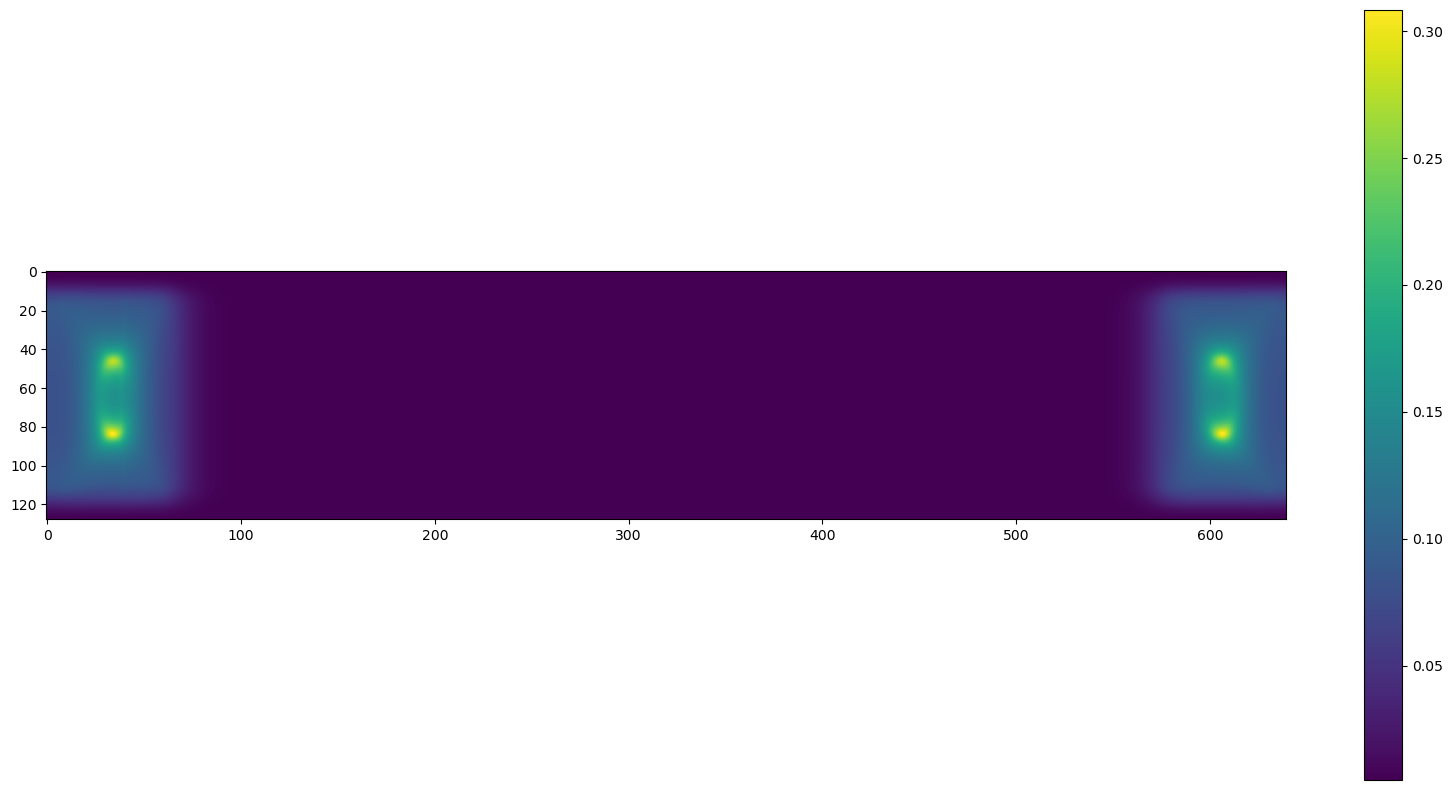

In [51]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,,:]) #vmax = 0.01
plt.colorbar()

In [133]:
np.exp(Density).min()

0.007560405778082576

In [134]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

33280

In [52]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

0.004398964351309154

In [53]:
Temp.min()

0.004398964351309154

In [137]:
rho_fields.min()

-0.7194252063844384

In [7]:
df.close()
# df_fields.close()